# Building single-sample regulatory networks using LIONESS and netZooPy
### Author: 
Qi (Alex) Song*.

*Channing division of network medicine, Brigham's and Women hospital and Harvard Medical School, Boston, MA. (qi.song@channing.harvard.edu)

## 1. Introduction
In this tutorial, we will briefly walk through the steps to perform analysis with Lioness algorithm using netZooPy package. Lioness is an algorithm for estimating sample-specific gene regualtory networks in a population.  LIONESS infers individual sample networks by applying linear interpolation to the predictions made by existing aggregate network inference approaches [1]. In this tutorial, we will use Panda as our basic network inference apporach to build sample-specific networks.

## 2. Installation of netZooPy.
netZooPy comes with full support for Lioness algorithm. netZooPy can be installed through `pip` command. For more details, please refer to the installation guide at netZooPy documentation site [here](https://netzoopy.readthedocs.io/en/latest/install/index.html).    

## 3. Load required modules
We will need `Panda` and `Lioness` python classes from netZooPy package. We will also need `read_csv()` function from `pandas` package for demonstrating the input data sets.

In [1]:
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
from netZooPy.lioness.analyze_lioness import AnalyzeLioness
import pandas as pd

## 4. Load input data

Now let's look at the three data sets to get a sense about what the inputs look like.

In [3]:
exp_data = pd.read_csv('netZooPy/tests/ToyData/ToyExpressionData.txt',header=None, index_col = 0, sep = "\t")
motif_data = pd.read_csv('netZooPy/tests/ToyData/ToyMotifData.txt',header=None, sep = "\t")
ppi_data = pd.read_csv('netZooPy/tests/ToyData/ToyPPIData.txt',header=None, sep = "\t")

Expression data is a matrix where rows are genes and columns are samples.There are 1000 genes and 50 samples in this expression dataset

In [4]:
exp_data

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
AACSL,0.141431,-4.153056,2.854971,0.413670,1.082093,1.882361,1.450223,2.130209,0.548923,0.583043,...,-4.551870,-6.645621,-3.970460,-2.041915,0.811989,0.979641,0.063161,3.652624,-2.387639,0.929521
AAK1,3.528478,-0.949701,1.039986,-1.618816,-1.228012,-0.171763,-2.822020,0.047464,-0.456019,1.134087,...,2.808942,-0.035529,0.473384,-1.971053,1.759803,3.151289,-5.189503,-0.233187,0.349614,0.704183
ABCA17P,-2.597842,3.970710,-2.809212,0.474679,-2.714377,-0.474146,-6.738092,-2.811364,-1.017466,-1.646993,...,-2.324379,-0.999586,0.987566,2.591347,-1.445705,-2.788339,2.295727,0.953828,-1.094031,-2.104951
ABCB8,0.352052,-1.866545,-0.007765,3.289632,2.675149,3.819294,0.668285,2.608310,3.342104,-2.792534,...,-3.666569,-0.074404,4.630231,0.883074,-1.573444,4.909868,0.866853,2.374492,1.410069,-3.828003
ABCC1,-4.638927,2.440799,-1.655580,0.506424,3.289914,2.460479,-1.003678,1.537393,-1.342323,-1.003316,...,-0.375289,-3.214583,5.531917,-1.693335,1.506472,1.020980,4.933972,2.268159,-0.734398,-2.618825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF826,-4.294209,-4.498573,2.786462,-1.588052,1.542248,3.222761,-0.005525,-4.711981,-0.580551,2.152243,...,-1.023105,-1.675647,3.320340,2.108714,-5.961589,1.679723,-1.473783,1.871397,1.968646,-1.017821
ZNF845,-1.661144,-6.986089,2.273928,-2.426933,-4.627002,-4.044476,-3.991184,-0.903110,1.558416,0.672473,...,-0.990304,-1.806129,1.643056,1.932765,1.084221,-1.214410,-2.985126,-10.986240,0.159237,0.906706
ZNF878,3.395504,-6.274497,0.455548,0.592239,-0.852212,1.373684,-2.638325,4.028651,-1.117790,-2.844150,...,-4.858309,1.752461,1.630060,-0.079563,-0.545380,-2.694063,-0.535988,-0.038242,-1.353040,-1.713555


Motif data should be formatted into a three-column list, where first column contains TF IDs and second column the target gene IDs and third column the interaction scores. 

In [5]:
motif_data

,0,1,2
0,AHR,41157,1.0
1,AHR,AAK1,1.0
2,AHR,ABCA17P,1.0
3,AHR,ABCB8,1.0
4,AHR,ABCC1,1.0
...,...,...,...
14592,YY1,ZNF776,1.0
14593,YY1,ZNF826,1.0
14594,YY1,ZNF878,1.0
14595,YY1,ZSWIM3,1.0


There are 87 unique TFs and 913 unique motifs in this motif dataset.

In [6]:
motif_data[0].unique().shape[0]

87

In [7]:
motif_data[1].unique().shape[0]

913

PPI (protein protein interaction) data should be formatted into a three-column list, where first two columns contain protein IDs and third column contains a score for each interaction

In [8]:
ppi_data

,0,1,2
0,AHR,ESR1,1
1,AHR,RELA,1
2,AHR,NR2F1,1
3,AR,SP1,1
4,RUNX1,JUN,1
...,...,...,...
233,NFKB1,RELA,1
234,DDIT3,HOXA5,1
235,NR3C1,NR2E3,1
236,HLF,MYB,1


This PPI dataset has 238 interactions among 87 TFs.

In [9]:
pd.concat([ppi_data[0],ppi_data[1]]).unique().size

87

## 5. Run Panda
Before running Lioness, we will first need to generate a `Panda` object. This will be used later to run `Lioness`. Note that the argument `keep_expression_matrix` should be specified as `True`. As Lioness iteractions need to call Panda function to build networks, which needs expression matrix as input. 

In [17]:
panda_obj = Panda('netZooPy/tests/ToyData/ToyExpressionData.txt',
                  'netZooPy/tests/ToyData/ToyMotifData.txt',
                  'netZooPy/tests/ToyData/ToyPPIData.txt',
                  remove_missing=False, 
                  keep_expression_matrix=True)

Loading motif data ...
Unique TFs: 87
  Elapsed time: 0.01 sec.
Loading expression data ...
Expression matrix: (1000, 50)
  Elapsed time: 0.01 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.00 sec.
Calculating coexpression network ...
  Elapsed time: 0.03 sec.
Creating motif network ...
  Elapsed time: 0.02 sec.
Creating PPI network ...
  Elapsed time: 0.00 sec.
Normalizing networks ...
  Elapsed time: 0.07 sec.
Saving expression matrix and normalized networks ...
  Elapsed time: 0.02 sec.
Running PANDA algorithm ...
step: 0, hamming: 0.7189662815459754
step: 1, hamming: 0.3899291546314954
step: 2, hamming: 0.40236683889692043
step: 3, hamming: 0.4005209618112847
step: 4, hamming: 0.38904060163854676
step: 5, hamming: 0.37050927774796627
step: 6, hamming: 0.346813714233211
step: 7, hamming: 0.3197200219092709
step: 8, hamming: 0.290805929638121
step: 9, hamming: 0.2614076747991081
step: 10, hamming: 0.2325667493310834
step: 11, hamming: 0.2050473463652485
step: 12, ham

## 6. Run Lioness to estimate sample-specific networks
We will first use the `Panda` object as input for `Lioness` object. Then `Lioness` will run Panda algorithm in its iterations to estimate sample-specific network for each sample.   

In [18]:
lioness_obj = Lioness(panda_obj)

Loading input data ...
  Elapsed time: 0.00 sec.
Running LIONESS for sample 1:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.05 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6451915130131665
step: 1, hamming: 0.6067461274659866
step: 2, hamming: 0.6105604110178086
step: 3, hamming: 0.5875350566544837
step: 4, hamming: 0.553598317095621
step: 5, hamming: 0.5130977642028344
step: 6, hamming: 0.46888897174383587
step: 7, hamming: 0.42325335262309544
step: 8, hamming: 0.3780071410446651
step: 9, hamming: 0.3345126063650471
step: 10, hamming: 0.29371889150860553
step: 11, hamming: 0.256215635375215
step: 12, hamming: 0.2223029668802453
step: 13, hamming: 0.19205902295385965
step: 14, hamming: 0.16540299653390683
step: 15, hamming: 0.14214587924488872
step: 16, hamming: 0.12203018089850888
step: 17, hamming: 0.10475927721891459
step: 18, hamming: 0.09001790128025045
step: 19, hamming: 0.07748617353400274
step: 20, hamming: 0.066849207

step: 44, hamming: 0.0010036223951606135
step: 45, hamming: 0.0008236331272743101
Running panda took: 1.37 seconds!
  Elapsed time: 1.37 sec.
Saving LIONESS network 4 to lioness_output using npy format:
  Elapsed time: 0.02 sec.
Running LIONESS for sample 5:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.03 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6446007808140573
step: 1, hamming: 0.6066561612626608
step: 2, hamming: 0.6105143267305174
step: 3, hamming: 0.5875153809819785
step: 4, hamming: 0.5536025207133696
step: 5, hamming: 0.5131152115952171
step: 6, hamming: 0.46890851450749593
step: 7, hamming: 0.42326886776988776
step: 8, hamming: 0.3780158211356529
step: 9, hamming: 0.3345152633298887
step: 10, hamming: 0.2937178419931415
step: 11, hamming: 0.2562128416941286
step: 12, hamming: 0.22229937209191528
step: 13, hamming: 0.19205541566268614
step: 14, hamming: 0.16539967610526804
step: 15, hamming: 0.14214304912137624
step

step: 39, hamming: 0.0026794641739463394
step: 40, hamming: 0.0022038487570621673
step: 41, hamming: 0.0018115310562277815
step: 42, hamming: 0.0014882867079583828
step: 43, hamming: 0.0012221964189122285
step: 44, hamming: 0.0010033169964392779
step: 45, hamming: 0.0008233821537042111
Running panda took: 1.37 seconds!
  Elapsed time: 1.37 sec.
Saving LIONESS network 8 to lioness_output using npy format:
  Elapsed time: 0.06 sec.
Running LIONESS for sample 9:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.05 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6448351993831178
step: 1, hamming: 0.6064879489440816
step: 2, hamming: 0.6103640777269351
step: 3, hamming: 0.5873512050264047
step: 4, hamming: 0.5534219407870923
step: 5, hamming: 0.5129356817661761
step: 6, hamming: 0.46874212604373694
step: 7, hamming: 0.42312367964198355
step: 8, hamming: 0.37789569142567153
step: 9, hamming: 0.33441876359267736
step: 10, hamming: 0.29364043

step: 38, hamming: 0.0032564793806740514
step: 39, hamming: 0.0026804732113290546
step: 40, hamming: 0.00220467863067728
step: 41, hamming: 0.0018122132860573486
step: 42, hamming: 0.0014888473474811738
step: 43, hamming: 0.0012226569714781802
step: 44, hamming: 0.0010036952106255875
step: 45, hamming: 0.0008236926599718468
Running panda took: 1.44 seconds!
  Elapsed time: 1.44 sec.
Saving LIONESS network 12 to lioness_output using npy format:
  Elapsed time: 0.02 sec.
Running LIONESS for sample 13:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.05 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6454815045482025
step: 1, hamming: 0.6064888334615245
step: 2, hamming: 0.610353785046755
step: 3, hamming: 0.5873467987983988
step: 4, hamming: 0.5534173891580667
step: 5, hamming: 0.5129251262883208
step: 6, hamming: 0.4687264900712108
step: 7, hamming: 0.4231036921678549
step: 8, hamming: 0.37787210728432713
step: 9, hamming: 0.334392508

step: 36, hamming: 0.004790418528106762
step: 37, hamming: 0.003951344147935315
step: 38, hamming: 0.0032554682222274782
step: 39, hamming: 0.0026796408398129684
step: 40, hamming: 0.002203993820812893
step: 41, hamming: 0.0018116502262686585
step: 42, hamming: 0.001488384584632186
step: 43, hamming: 0.0012222767839663953
step: 44, hamming: 0.0010033829666874518
step: 45, hamming: 0.000823436296690418
Running panda took: 1.47 seconds!
  Elapsed time: 1.47 sec.
Saving LIONESS network 16 to lioness_output using npy format:
  Elapsed time: 0.02 sec.
Running LIONESS for sample 17:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.03 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6453372188039735
step: 1, hamming: 0.6066676287287168
step: 2, hamming: 0.6104644764183814
step: 3, hamming: 0.5874393760760523
step: 4, hamming: 0.553506577030067
step: 5, hamming: 0.513009831711223
step: 6, hamming: 0.46880493446531923
step: 7, hamming: 0.42317

step: 31, hamming: 0.01217312410619027
step: 32, hamming: 0.01015898896686592
step: 33, hamming: 0.008449235814467613
step: 34, hamming: 0.007007685785454703
step: 35, hamming: 0.00579903522329828
step: 36, hamming: 0.004790206180267455
step: 37, hamming: 0.003951172904489711
step: 38, hamming: 0.0032553302873377606
step: 39, hamming: 0.0026795297588183783
step: 40, hamming: 0.002203904360801872
step: 41, hamming: 0.0018115780790296146
step: 42, hamming: 0.0014883263714357698
step: 43, hamming: 0.0012222297878657692
step: 44, hamming: 0.0010033450031440966
step: 45, hamming: 0.0008234056073751168
Running panda took: 1.44 seconds!
  Elapsed time: 1.44 sec.
Saving LIONESS network 20 to lioness_output using npy format:
  Elapsed time: 0.02 sec.
Running LIONESS for sample 21:
Computing coexpression network:
  Elapsed time: 0.01 sec.
Normalizing networks:
  Elapsed time: 0.05 sec.
Inferring LIONESS network:
step: 0, hamming: 0.6450848367279335
step: 1, hamming: 0.6066233811194319
step: 2, h

step: 28, hamming: 0.020384097306212396
step: 29, hamming: 0.017255699648224446
step: 30, hamming: 0.014529113182227082
step: 31, hamming: 0.01217494163127554
step: 32, hamming: 0.010160495993560507
step: 33, hamming: 0.00845048121903037
step: 34, hamming: 0.007008712784988987
step: 35, hamming: 0.005799880479159791
step: 36, hamming: 0.0047909007626825515
step: 37, hamming: 0.003951742881773004
step: 38, hamming: 0.003255797494304968
step: 39, hamming: 0.002679912466988639
step: 40, hamming: 0.0022042177025821627
step: 41, hamming: 0.0018118345457225505
step: 42, hamming: 0.001488536241043407
step: 43, hamming: 0.0012224015057432389
step: 44, hamming: 0.0010034854919391913
step: 45, hamming: 0.0008235205432486311
Running panda took: 1.63 seconds!
  Elapsed time: 1.63 sec.
Saving LIONESS network 24 to lioness_output using npy format:
  Elapsed time: 0.03 sec.
Running LIONESS for sample 25:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0

step: 24, hamming: 0.03759781991517671
step: 25, hamming: 0.032487194607542826
step: 26, hamming: 0.027959154377771425
step: 27, hamming: 0.02393957466123415
step: 28, hamming: 0.02038183196273885
step: 29, hamming: 0.0172537603782067
step: 30, hamming: 0.014527461133636087
step: 31, hamming: 0.012173542661750416
step: 32, hamming: 0.010159317402521097
step: 33, hamming: 0.008449492965825199
step: 34, hamming: 0.0070078870284569885
step: 35, hamming: 0.005799192688495383
step: 36, hamming: 0.004790329522725734
step: 37, hamming: 0.003951269494190278
step: 38, hamming: 0.0032554058740101068
step: 39, hamming: 0.002679588945293777
step: 40, hamming: 0.002203950746453343
step: 41, hamming: 0.0018116144780692205
step: 42, hamming: 0.0014883549740263417
step: 43, hamming: 0.0012222522977348154
step: 44, hamming: 0.0010033627438220327
step: 45, hamming: 0.0008234196121337722
Running panda took: 1.47 seconds!
  Elapsed time: 1.47 sec.
Saving LIONESS network 28 to lioness_output using npy form

step: 20, hamming: 0.06684228198432347
step: 21, hamming: 0.057799594299135344
step: 22, hamming: 0.050070253711365226
step: 23, hamming: 0.043405873825744117
step: 24, hamming: 0.03759871933174081
step: 25, hamming: 0.03248800162100365
step: 26, hamming: 0.027959871764145786
step: 27, hamming: 0.023940202435957004
step: 28, hamming: 0.0203823727736058
step: 29, hamming: 0.01725422092678858
step: 30, hamming: 0.014527849564486101
step: 31, hamming: 0.01217386793079806
step: 32, hamming: 0.010159588465741652
step: 33, hamming: 0.008449718062226332
step: 34, hamming: 0.007008073488535551
step: 35, hamming: 0.005799346994199016
step: 36, hamming: 0.004790456976200907
step: 37, hamming: 0.003951374637817454
step: 38, hamming: 0.003255492594470654
step: 39, hamming: 0.0026796605246515556
step: 40, hamming: 0.002204009784151208
step: 41, hamming: 0.0018116631348835933
step: 42, hamming: 0.0014883950460219354
step: 43, hamming: 0.001222285278787714
step: 44, hamming: 0.0010033898748033553
ste

step: 18, hamming: 0.09002215316977837
step: 19, hamming: 0.07748976024988688
step: 20, hamming: 0.06685218168838661
step: 21, hamming: 0.05780791039379919
step: 22, hamming: 0.050077221528608516
step: 23, hamming: 0.0434117205050181
step: 24, hamming: 0.037603623119995024
step: 25, hamming: 0.03249211431074741
step: 26, hamming: 0.027963316385545108
step: 27, hamming: 0.023943089250558148
step: 28, hamming: 0.020384791637139868
step: 29, hamming: 0.017256245588859704
step: 30, hamming: 0.014529542455540409
step: 31, hamming: 0.012175281230148284
step: 32, hamming: 0.010160766715614722
step: 33, hamming: 0.008450698522426137
step: 34, hamming: 0.007008887974781527
step: 35, hamming: 0.005800022398900317
step: 36, hamming: 0.004791016237650568
step: 37, hamming: 0.003951837291752234
step: 38, hamming: 0.00325587489135729
step: 39, hamming: 0.0026799760260441635
step: 40, hamming: 0.0022042699447564137
step: 41, hamming: 0.0018118775067475124
step: 42, hamming: 0.0014885715795620964
step

step: 13, hamming: 0.19204895567253832
step: 14, hamming: 0.16539501582991112
step: 15, hamming: 0.14213947488622694
step: 16, hamming: 0.12202499625028415
step: 17, hamming: 0.10475511557113841
step: 18, hamming: 0.09001460630282851
step: 19, hamming: 0.07748348660857823
step: 20, hamming: 0.06684699483703208
step: 21, hamming: 0.05780364640854137
step: 22, hamming: 0.050073752658040344
step: 23, hamming: 0.04340891190950424
step: 24, hamming: 0.03760138090088408
step: 25, hamming: 0.03249034534683271
step: 26, hamming: 0.027961940282617167
step: 27, hamming: 0.02394202780317782
step: 28, hamming: 0.020383977524069206
step: 29, hamming: 0.017255623043299223
step: 30, hamming: 0.014529064889671081
step: 31, hamming: 0.012174912034662342
step: 32, hamming: 0.010160478451575828
step: 33, hamming: 0.008450471314942093
step: 34, hamming: 0.007008707096476387
step: 35, hamming: 0.005799877499710264
step: 36, hamming: 0.0047908995699176915
step: 37, hamming: 0.00395174269330924
step: 38, ham

step: 9, hamming: 0.3344757818245871
step: 10, hamming: 0.29368699908851514
step: 11, hamming: 0.25618810836906636
step: 12, hamming: 0.22227915239937626
step: 13, hamming: 0.19203863188744116
step: 14, hamming: 0.16538554120286303
step: 15, hamming: 0.1421309400195572
step: 16, hamming: 0.12201736565539252
step: 17, hamming: 0.10474825814801286
step: 18, hamming: 0.09000844987911948
step: 19, hamming: 0.07747797083444699
step: 20, hamming: 0.06684205040520512
step: 21, hamming: 0.057799246297848224
step: 22, hamming: 0.05006983470329826
step: 23, hamming: 0.0434054377789933
step: 24, hamming: 0.03759830798077482
step: 25, hamming: 0.032487644623876356
step: 26, hamming: 0.027959585227725074
step: 27, hamming: 0.02393999328159403
step: 28, hamming: 0.020382235303793003
step: 29, hamming: 0.017254142326846075
step: 30, hamming: 0.0145278165923739
step: 31, hamming: 0.012173865559254836
step: 32, hamming: 0.010159605065697939
step: 33, hamming: 0.008449745022944615
step: 34, hamming: 0.0

step: 3, hamming: 0.5874284484527396
step: 4, hamming: 0.5535259596516843
step: 5, hamming: 0.513054704775382
step: 6, hamming: 0.4688708582148043
step: 7, hamming: 0.42325992634308324
step: 8, hamming: 0.37803721253202954
step: 9, hamming: 0.33456092176953284
step: 10, hamming: 0.29377908789293194
step: 11, hamming: 0.25628124480181685
step: 12, hamming: 0.22236874382375207
step: 13, hamming: 0.19212159497551798
step: 14, hamming: 0.165460467724724
step: 15, hamming: 0.1421972940894272
step: 16, hamming: 0.12207523597375464
step: 17, hamming: 0.10479810759599201
step: 18, hamming: 0.09005092233539186
step: 19, hamming: 0.07751386224984219
step: 20, hamming: 0.06687216133585415
step: 21, hamming: 0.05782432168099327
step: 22, hamming: 0.050090599604048575
step: 23, hamming: 0.04342254449049325
step: 24, hamming: 0.03761235473029859
step: 25, hamming: 0.03249915130287423
step: 26, hamming: 0.027968991909988243
step: 27, hamming: 0.023947673742928513
step: 28, hamming: 0.0203885079292985

## 7. Run Lioness with co-expression matrix
Lioness can work with co-expression matrix. To compute Lioness with coexpression matrix, we can set motif data to `None`:

In [15]:
motif = None

# Make sure to keep epxression matrix for next step
panda_obj = Panda('netZooPy/tests/ToyData/ToyExpressionData.txt',
                  None,
                  'netZooPy/tests/ToyData/ToyPPIData.txt',
                  save_tmp=True,
                  remove_missing=False,
                  keep_expression_matrix=True)
lioness_obj = Lioness(panda_obj)

Loading expression data ...
Expression matrix: (1000, 50)
  Elapsed time: 0.02 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.01 sec.
Calculating coexpression network ...
  Elapsed time: 0.03 sec.
Returning the correlation matrix of expression data in <Panda_obj>.correlation_matrix
Loading input data ...
  Elapsed time: 0.00 sec.
Running LIONESS for sample 1:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 1 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 2:
Computing coexpression network:
  Elapsed time: 0.03 sec.
Normalizing networks:
  Elapsed time: 0.18 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 2 to lioness_output using npy format:
  Elapsed time: 0.05 sec.
Running LIONESS for sample 3:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing

Running LIONESS for sample 30:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.03 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 30 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 31:
Computing coexpression network:
  Elapsed time: 0.03 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 31 to lioness_output using npy format:
  Elapsed time: 0.03 sec.
Running LIONESS for sample 32:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  Elapsed time: 0.00 sec.
Saving LIONESS network 32 to lioness_output using npy format:
  Elapsed time: 0.04 sec.
Running LIONESS for sample 33:
Computing coexpression network:
  Elapsed time: 0.02 sec.
Normalizing networks:
  Elapsed time: 0.04 sec.
Inferring LIONESS network:
  

## 8. Visualize Lioness results
AnalyzeLioness() can be used to visualize lioness network. You may select only the `top` genes to be visualized in the graph. In current version of Lioness. Only the network of the first sample will be visualized using `.top_network_plot()` function.

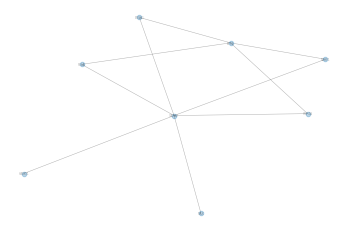

In [19]:
analyze_lioness_obj = AnalyzeLioness(lioness_obj)
analyze_lioness_obj.top_network_plot(top = 10, file = "lioness_top_10.png")

## 9. Save Lioness results
We can save Lioness results by using `save_lioness_results()` method of the `Lioness` object. The edge weights of Lioness predictions will be saved into output file. We can get TF and target IDs from the `.export_panda_results` property of `Panda` object. Each row correspond to a row in the Lioness output file.

In [20]:
panda_obj.export_panda_results

,tf,gene,motif,force
0,AHR,AACSL,0.0,-53.984356
1,AR,AACSL,0.0,27.276521
2,ARID3A,AACSL,1.0,-64.531519
3,ARNT,AACSL,1.0,-70.183704
4,BRCA1,AACSL,0.0,-57.854191
...,...,...,...,...
86995,TLX1,ZWILCH,0.0,15.673701
86996,TP53,ZWILCH,0.0,23.789647
86997,USF1,ZWILCH,0.0,-6.855873
86998,VDR,ZWILCH,0.0,20.885728


In [21]:
lioness_obj.save_lioness_results(file = 'lioness.txt')

## References
Kuijjer ML, Tung MG, Yuan GC, Quackenbush J, Glass K: Estimating Sample-Specific Regulatory Networks. iScience 2019.